<a href="https://colab.research.google.com/github/barath220904/CODSOFT/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Cleaned Train shape: (143736, 23)
✅ Cleaned Test shape: (143686, 23)

🧾 Training Fraud Counts:
 is_fraud
0.0    142424
1.0      1312
Name: count, dtype: int64


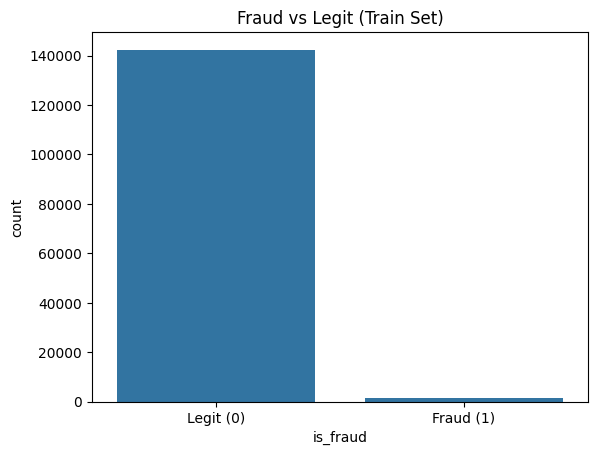


✅ Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    143059
         1.0       0.49      0.11      0.19       627

    accuracy                           1.00    143686
   macro avg       0.74      0.56      0.59    143686
weighted avg       0.99      1.00      0.99    143686

📈 ROC-AUC Score: 0.5571541383317239


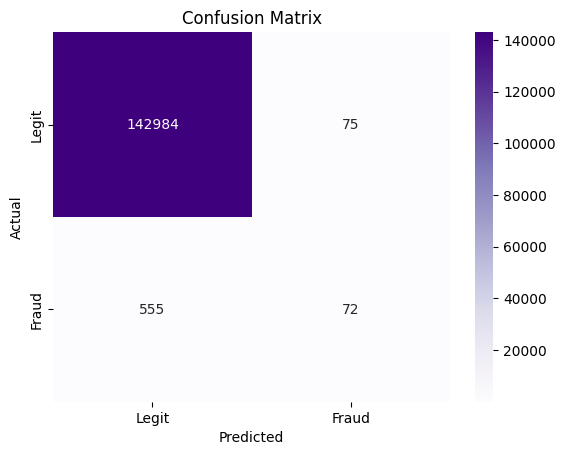


🧪 Prediction on a sample transaction: Legit


In [4]:
# 💳 Credit Card Fraud Detection using fraudTrain.csv and fraudTest.csv

# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

# 📂 Step 2: Load and Clean the Dataset
df_train = pd.read_csv("fraudTrain.csv")
df_test = pd.read_csv("fraudTest.csv")

# Drop rows with missing target labels
df_train.dropna(subset=['is_fraud'], inplace=True)
df_test.dropna(subset=['is_fraud'], inplace=True)

# Fill any remaining missing values with 0
df_train.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

print("✅ Cleaned Train shape:", df_train.shape)
print("✅ Cleaned Test shape:", df_test.shape)

# 🔍 Step 3: Explore Class Distribution
print("\n🧾 Training Fraud Counts:\n", df_train['is_fraud'].value_counts())

sns.countplot(x='is_fraud', data=df_train)
plt.title("Fraud vs Legit (Train Set)")
plt.xticks([0, 1], ['Legit (0)', 'Fraud (1)'])
plt.show()

# 🧼 Step 4: Data Preprocessing

# Keep only numeric columns
df_train = df_train.select_dtypes(include=[np.number])
df_test = df_test.select_dtypes(include=[np.number])

# Separate features and labels
X_train = df_train.drop(columns=['is_fraud'])
y_train = df_train['is_fraud']

X_test = df_test.drop(columns=['is_fraud'])
y_test = df_test['is_fraud']

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🧠 Step 5: Train Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 📊 Step 6: Evaluate the Model
y_pred = model.predict(X_test_scaled)

print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))
print("📈 ROC-AUC Score:", roc_auc_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Legit', 'Fraud'], yticklabels=['Legit', 'Fraud'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 🔎 Step 7: Predict on a Sample Transaction
sample = X_test_scaled[0].reshape(1, -1)
prediction = model.predict(sample)
print("\n🧪 Prediction on a sample transaction:", "Fraud" if prediction[0] == 1 else "Legit")
